In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
import numpy as np
import sys
from google.colab import files
uploaded = files.upload()

Saving Boletin_Procesado.xlt to Boletin_Procesado.xlt


In [12]:
# Función para cargar y procesar una hoja
def cargar_hoja(archivo, hoja, skiprows, moneda):
    df = pd.read_excel(archivo, sheet_name=hoja, skiprows=skiprows, usecols=lambda x: 'Unnamed' not in x)
    df["Moneda"] = moneda
    return df.fillna(method='ffill')

# Cargar todas las hojas
df_eeff_mn = cargar_hoja("Boletín Bancos MN.xlsm", "1. EEFF", 23, "MN")
df_eeff_me = cargar_hoja("Boletín Bancos ME.xlsm", "1. EEFF", 23, "ME")

df_cartera_mn = cargar_hoja("Boletín Bancos MN.xlsm", "3. Cartera", 23, "MN")
df_cartera_me = cargar_hoja("Boletín Bancos ME.xlsm", "3. Cartera", 23, "ME")

df_sector_mn = cargar_hoja("Boletín Bancos MN.xlsm", "5. Cred. por sector", 21, "MN")
df_sector_me = cargar_hoja("Boletín Bancos ME.xlsm", "5. Cred. por sector", 21, "ME")

df_actividad_mn = cargar_hoja("Boletín Bancos MN.xlsm", "6. Cred. por acti", 17, "MN")
df_actividad_me = cargar_hoja("Boletín Bancos ME.xlsm", "6. Cred. por acti", 17, "ME")

# Unir MN y ME por tipo
df_eeff = pd.concat([df_eeff_mn, df_eeff_me], ignore_index=True)
df_cartera = pd.concat([df_cartera_mn, df_cartera_me], ignore_index=True)
df_sector = pd.concat([df_sector_mn, df_sector_me], ignore_index=True)
df_actividad = pd.concat([df_actividad_mn, df_actividad_me], ignore_index=True)

# Guardar en un nuevo archivo Excel con varias hojas
with pd.ExcelWriter("Boletin_Procesado.xlsx", engine='openpyxl') as writer:
    df_eeff.to_excel(writer, sheet_name="EEFF", index=False)
    df_cartera.to_excel(writer, sheet_name="Cartera", index=False)
    df_sector.to_excel(writer, sheet_name="Cred_por_sector", index=False)
    df_actividad.to_excel(writer, sheet_name="Cred_por_actividad", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Boletín Bancos MN.xlsm'

In [3]:
excel_file = "Boletin_Procesado.xlt"
print(excel_file)

Boletin_Procesado.xlt


In [4]:
import os
print(os.listdir())

['.config', 'Boletin_Procesado.xlt', 'Boletin_Procesado (2).xlsx', 'Boletin_Procesado.xlsx', 'Boletin_Procesado (1).xlsx', 'sample_data']


In [6]:
# Cargar todas las hojas del archivo
excel_file = "Boletin_Procesado.xlt"
sheets_dict = pd.read_excel(excel_file, sheet_name=None)  # Lee todas las hojas como un diccionario

# Guardar cada hoja en un DataFrame separado
df_eeff = sheets_dict["EEFF"]
df_cartera = sheets_dict["Cartera"]
df_sector = sheets_dict["Cred_por_sector"]
df_actividad = sheets_dict["Cred_por_actividad"]

# Mostrar para confirmar
print("Hojas cargadas:")
for nombre in sheets_dict:
    print(f"- {nombre}")

Hojas cargadas:
- EEFF
- Cartera
- Cred_por_sector
- Cred_por_actividad


In [7]:
# Filtrar solo los datos del Sector Agri
df_sector_agri = df_sector[df_sector["Sector E."].str.contains("AGRICULTURA", na=False)]

# Cambiar el formato fecha
df_sector_agri['Fecha'] = pd.to_datetime(df_sector_agri['Fecha'].astype(str) + '/01', format='%Y/%m/%d')

<ipython-input-7-003d17b1a491>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector_agri['Fecha'] = pd.to_datetime(df_sector_agri['Fecha'].astype(str) + '/01', format='%Y/%m/%d')


In [8]:
df_sector_agri.head()

,Fecha,Sector E.,Atlas,Bancop,Basa,BNA,BNF,Citibank,Continental,Do Brasil,...,Interfisa,Itaú,Regional,Río,Solar,Sudameris,UENO,Visión,Zeta,Moneda
2,2016-01-01,AGRICULTURA,41185.409522,16045.479312,17860.375384,5423.163206,605493.388886,0.000000,206516.958567,26160.829795,...,126020.851705,355901.509195,260824.451256,67891.391814,0.0,14842.417765,0.0,143240.695952,0.0,MN
16,2016-02-01,AGRICULTURA,40320.707056,16072.839808,16897.634363,5224.573884,595339.340213,49.157955,199867.699827,25966.528767,...,126827.897305,356697.465315,259562.275778,78532.289301,0.0,15481.779517,0.0,147510.438844,0.0,MN
30,2016-03-01,AGRICULTURA,36088.521845,19621.826036,15734.211851,4947.564455,550232.396346,0.000000,201133.264315,25856.218151,...,128616.005940,352712.517888,254525.302471,78261.183487,0.0,17331.017130,0.0,147654.306796,0.0,MN
44,2016-04-01,AGRICULTURA,36598.922049,19421.659220,17480.058018,4539.595701,532903.399800,20.676026,205748.990976,25990.324315,...,133895.362096,316883.455978,248998.458379,78475.409733,0.0,18618.970931,0.0,148863.488089,0.0,MN
58,2016-05-01,AGRICULTURA,31842.404714,25582.789163,16980.924473,5093.816257,521225.886836,0.000000,194543.983377,25975.473115,...,132491.779313,285150.153921,259406.557463,78348.309923,0.0,20393.696440,0.0,149730.149596,0.0,MN


**Traspuesta del dataset**

In [9]:
#Borramos la columna 'Sector E.' para evitar duplicados
df_sector_agri.drop(columns=['Sector E.'], inplace=True)
# Transponer el DataFrame
df_nuevo = df_sector_agri.melt(
    id_vars=["Fecha", "Moneda"],
    var_name="Banco",
    value_name="Credito"
)

<ipython-input-9-829ac902e8e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector_agri.drop(columns=['Sector E.'], inplace=True)


In [25]:
# Reemplazar nombres de bancos fusionados
df_nuevo["Banco"] = df_nuevo["Banco"].replace({
    "GNB Fusión": "GNB",
    "Regional": "Sudameris",
    "Visión": 'UENO'
})

**Descomposicion de la serie**

Se considera inicialmente todos los creditos otorgados, teniendo en cuenta un posible efecto combinado.

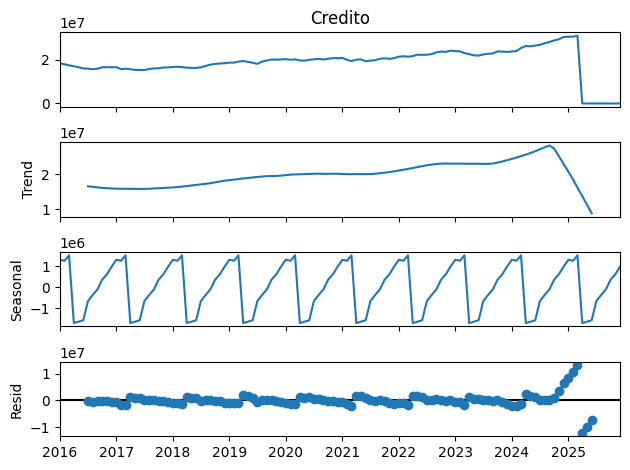

In [17]:
serie_total = df_nuevo.groupby("Fecha")["Credito"].sum().sort_index()
serie_total = serie_total.asfreq("MS")  # MS = Month Start
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposición aditiva
result = seasonal_decompose(serie_total, model="additive", period=12)

# Mostrar gráfica
result.plot()
plt.tight_layout()
plt.show()

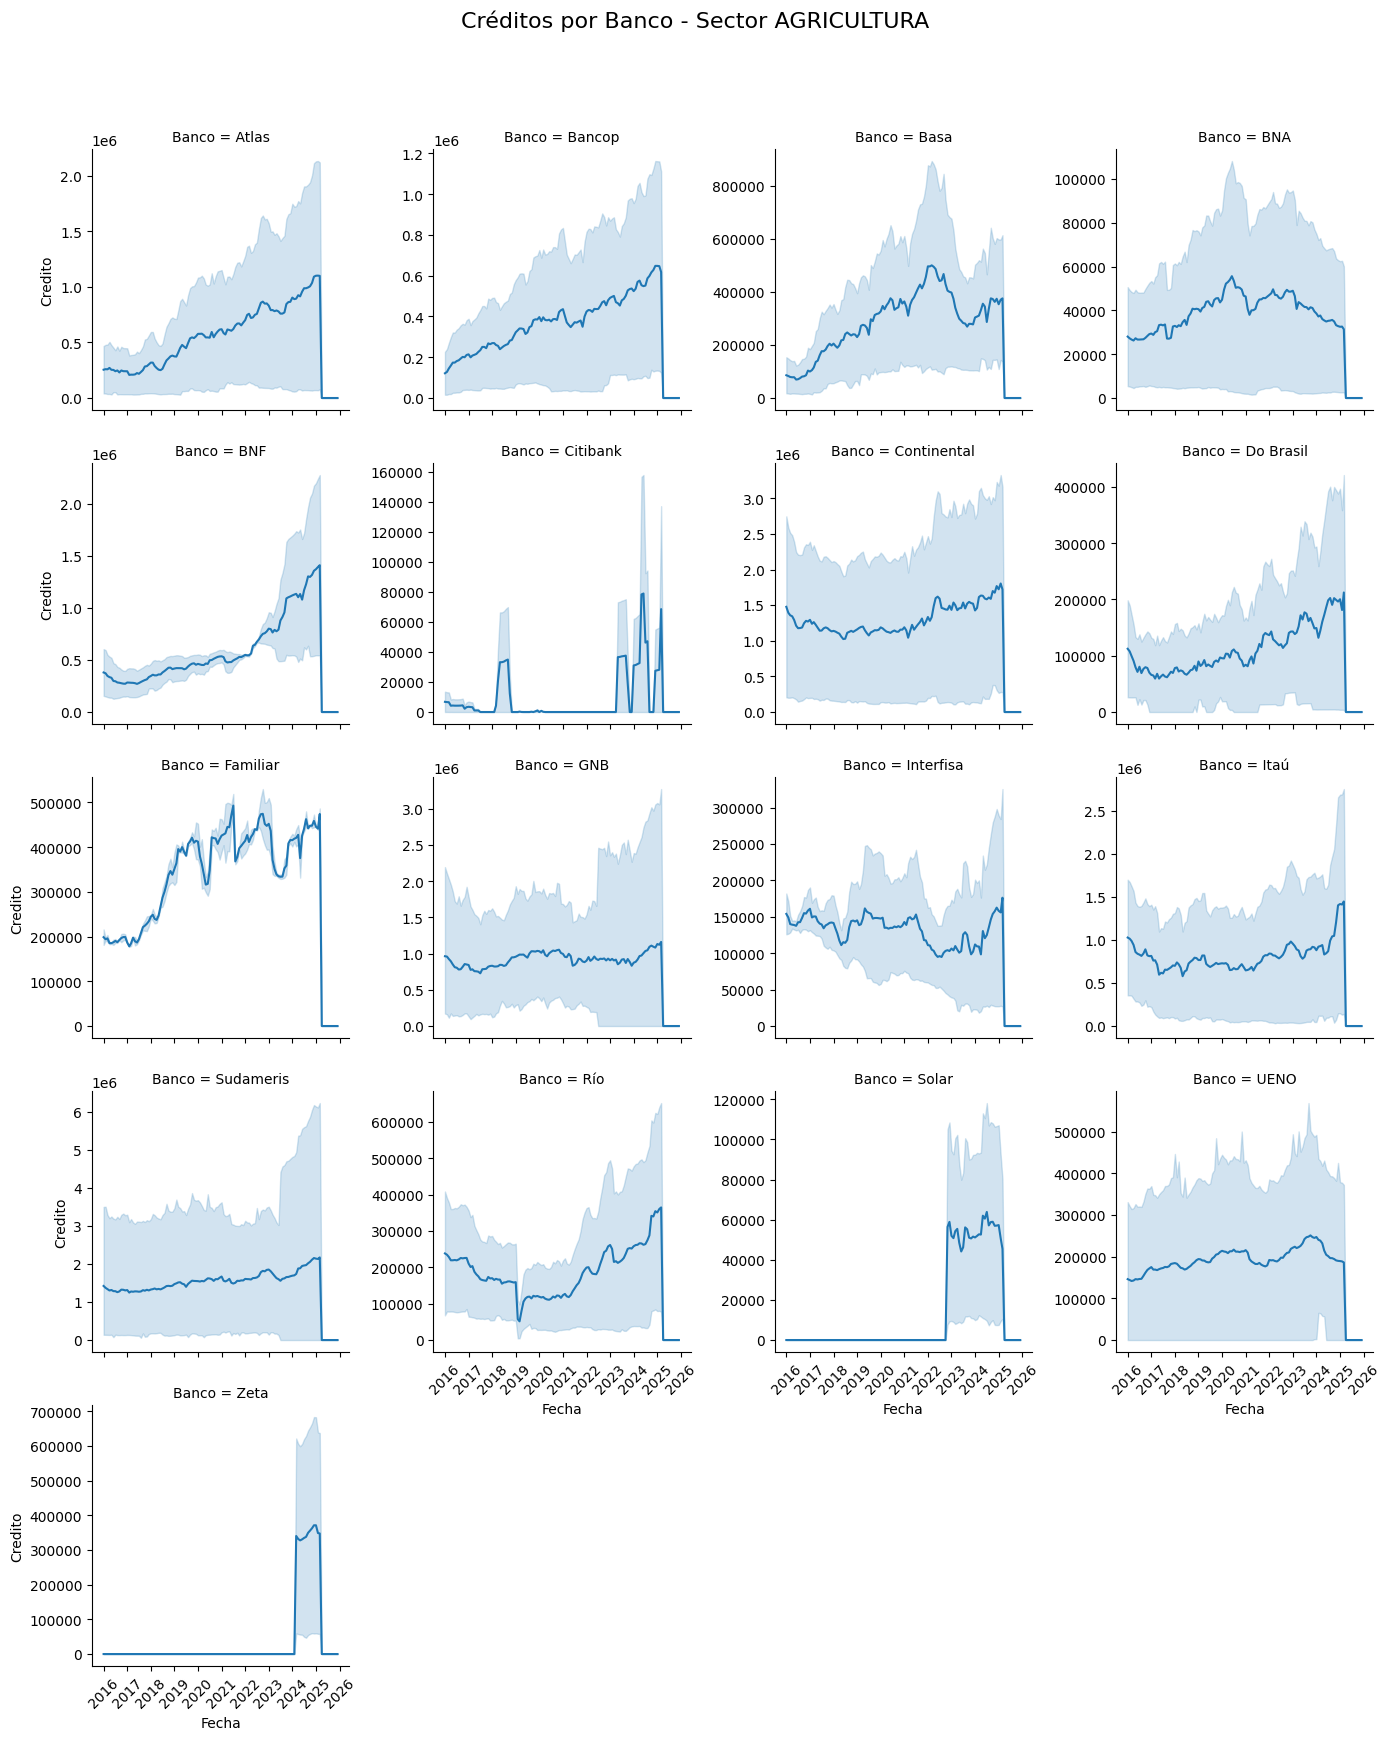

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumimos que df_nuevo tiene las columnas: Fecha, Banco, Credito

# Filtrar el sector AGRICULTURA (si no lo has hecho aún)
#df_agri = df_nuevo[df_nuevo["Sector E."] == "AGRICULTURA"]

# Opcional: convertir 'Fecha' a datetime si no está
#df_agri["Fecha"] = pd.to_datetime(df_agri["Fecha"])

# Crear FacetGrid: una gráfica por banco
g = sns.FacetGrid(df_nuevo, col="Banco", col_wrap=4, height=3.5, sharey=False)
# Mapear la serie temporal en cada panel
g.map_dataframe(sns.lineplot, x="Fecha", y="Credito")

# Mejorar etiquetas y rotación de fechas
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

g.set_axis_labels("Fecha", "Credito")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Créditos por Banco - Sector AGRICULTURA", fontsize=16)

plt.show()

**Observaciones de los graficos por banco:**

Se visualiza que para los bancos que se encuentran consolidados en el mercado, existe una tendencia positiva acumulada de los creditos otorgados.
Ejemplo: Atlas, Bancop, Familiar

Se puede catalogar como outliers aquellas entidades cuyo rubro no radica en el otorgamiento de creditos de la indole analizada.
Ejemplo: Solar, Zeta, Citi

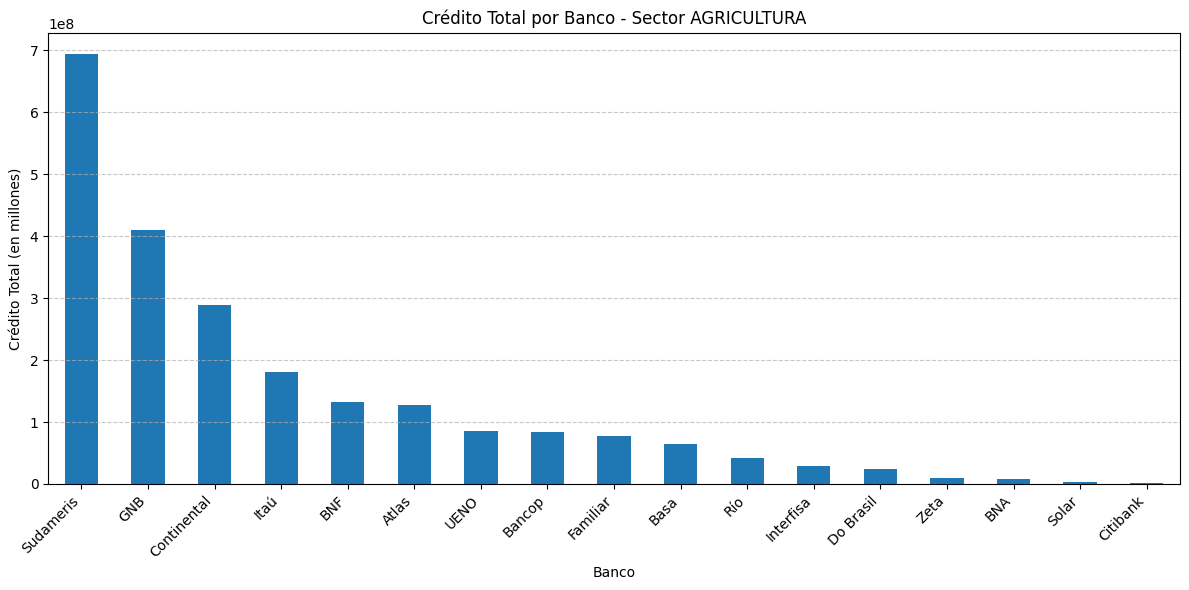

In [27]:
#Grafico de totales por banco
credito_total = df_nuevo.groupby("Banco")["Credito"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
credito_total.plot(kind='bar')
plt.title("Crédito Total por Banco - Sector AGRICULTURA")
plt.xlabel("Banco")
plt.ylabel("Crédito Total (en millones)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**ANALISIS POR ENTIDAD**

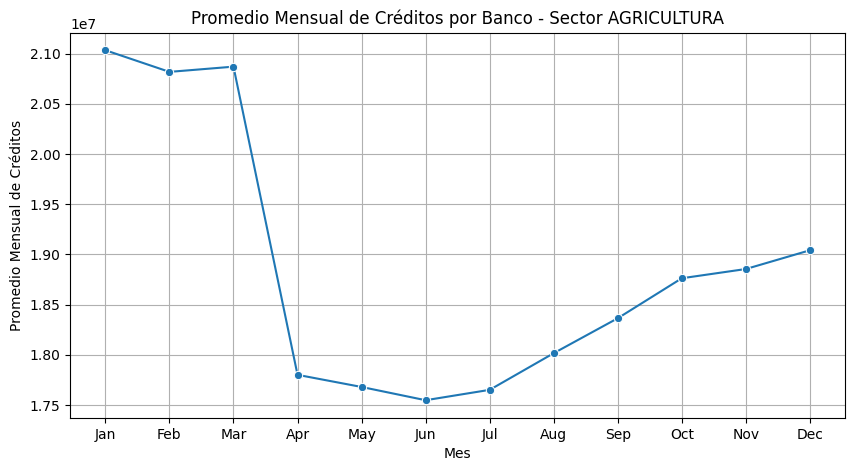

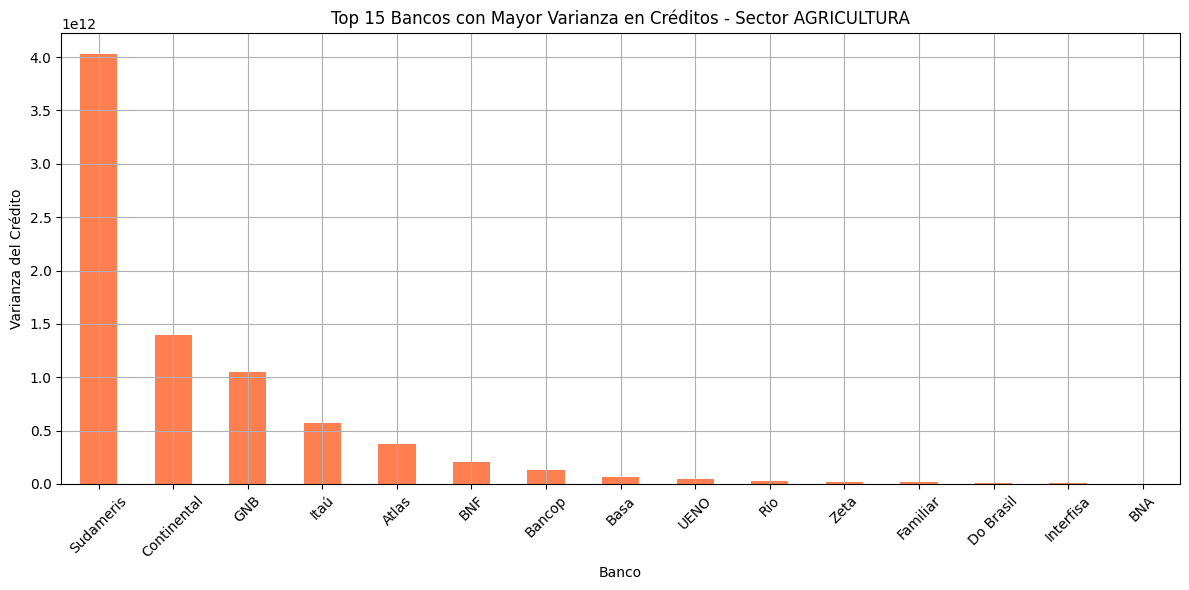

In [28]:
serie_total = df_nuevo.groupby("Fecha")["Credito"].sum().reset_index()

serie_total["Mes"] = serie_total["Fecha"].dt.month
serie_total["Mes_nombre"] = serie_total["Fecha"].dt.strftime('%b')  # Nombre corto del mes

promedios_mensuales = serie_total.groupby("Mes_nombre")["Credito"].mean().reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

plt.figure(figsize=(10, 5))
sns.lineplot(x=promedios_mensuales.index, y=promedios_mensuales.values, marker="o")
plt.title("Promedio Mensual de Créditos por Banco - Sector AGRICULTURA")
plt.xlabel("Mes")
plt.ylabel("Promedio Mensual de Créditos")
plt.grid(True)
# Agrupar por banco y calcular varianza
varianzas = df_nuevo.groupby("Banco")["Credito"].var().sort_values(ascending=False)

# Mostrar top 10 bancos más volátiles
#print("Top 10 bancos con mayor varianza en créditos:")
#print(varianzas.head(10))

plt.figure(figsize=(12, 6))
varianzas.head(15).plot(kind='bar', color='coral')
plt.title("Top 15 Bancos con Mayor Varianza en Créditos - Sector AGRICULTURA")
plt.xlabel("Banco")
plt.ylabel("Varianza del Crédito")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

El primer grafico indica que los creditos otorgados se consolidan en el primer trimestre del año, luego disminuye significativamente hasta el tercer trimestre donde vuelve a visualizarse una tendencia positiva pero mucho menor que a principios del periodo.

Varianza por bancos: Si bien Sudameris presenta la varianza mas alta se debe a que tiene el mayor volumen de creditos en el mercado.

Se ve la necesidad de la normalizacion de toda la serie.

**APLICACION DE ADF PARA VISUALIZAR COMPROBAR ESTACIONARIEDAD**

In [30]:
from statsmodels.tsa.stattools import adfuller #Prueba de estacionariedad
serie_total = df_nuevo.groupby("Fecha")["Credito"].sum().sort_index()
adf = adfuller(serie_total.dropna())
print(f"ADF Statistic: {adf[0]:.4f}")
print(f"p-value: {adf[1]:.4f}")

if adf[1] < 0.05:
    print("✅ La serie es estacionaria.")
else:
    print("⚠️ La serie NO es estacionaria.")

ADF Statistic: -1.5668
p-value: 0.5002
⚠️ La serie NO es estacionaria.
